In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as sps
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

# Подготовка данных

In [2]:
df = pd.read_csv('yellow_tripdata_2019-12.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.20,1.0,N,142,116,2.0,14.50,3.00,0.5,0.0,0.00,0.3,18.30,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.50,0.50,0.5,10.0,0.00,0.3,39.80,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.60,1.0,N,161,237,2.0,9.00,3.00,0.5,0.0,0.00,0.3,12.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896312,NaN,2019-12-31 00:07:00,2019-12-31 00:46:00,NaN,12.78,NaN,NaN,230,72,NaN,32.32,2.75,0.5,0.0,6.12,0.3,41.99,0.0
6896313,NaN,2019-12-31 00:20:00,2019-12-31 00:47:00,NaN,18.52,NaN,NaN,219,32,NaN,51.63,2.75,0.5,0.0,6.12,0.3,61.30,0.0
6896314,NaN,2019-12-31 00:50:00,2019-12-31 01:21:00,NaN,13.13,NaN,NaN,161,76,NaN,38.02,2.75,0.5,0.0,6.12,0.3,47.69,0.0
6896315,NaN,2019-12-31 00:38:19,2019-12-31 01:19:37,NaN,14.51,NaN,NaN,230,21,NaN,41.86,2.75,0.0,0.0,6.12,0.3,51.03,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896317 entries, 0 to 6896316
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 947.1+ MB


In [5]:
df.shape

(6896317, 18)

In [6]:
df.isna().sum()

VendorID                 51018
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          51018
trip_distance                0
RatecodeID               51018
store_and_fwd_flag       51018
PULocationID                 0
DOLocationID                 0
payment_type             51018
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [9]:
df['total_amount'] = df['total_amount'].astype('int64')

<ipython-input-9-726cfcb3ea30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amount'] = df['total_amount'].astype('int64')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6845299 entries, 0 to 6845298
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           int64  
 17  congestion_surcharge   float64
dtypes: float64(12), int64(3), object(3)
memory usage: 992.3+ MB


In [11]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.20,1.0,N,142,116,2.0,14.5,3.0,0.5,0.00,0.0,0.3,18,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.5,0.5,0.5,10.00,0.0,0.3,39,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.60,1.0,N,161,237,2.0,9.0,3.0,0.5,0.00,0.0,0.3,12,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845294,2.0,2019-12-31 23:09:42,2019-12-31 23:22:39,1.0,1.47,1.0,N,68,246,2.0,10.0,0.5,0.5,0.00,0.0,0.3,13,2.5
6845295,2.0,2019-12-31 23:46:57,2019-12-31 23:50:54,1.0,0.97,1.0,N,233,170,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10,2.5
6845296,2.0,2019-12-31 23:22:03,2019-12-31 23:29:06,1.0,3.30,1.0,N,262,224,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17,2.5
6845297,2.0,2019-12-31 23:33:47,2019-12-31 23:40:10,1.0,1.55,1.0,N,137,4,2.0,7.0,0.5,0.5,0.00,0.0,0.3,10,2.5


In [12]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

<ipython-input-12-563097f526d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


In [13]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

<ipython-input-13-6e7bcef0194b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


## Коррелиация стоимости поездки с другими факторами

In [14]:
numeric_col = ['passenger_count','trip_distance','RatecodeID','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'congestion_surcharge']

In [15]:
corr_matrix = df.loc[:,numeric_col].corr()
print(corr_matrix)

                      passenger_count  trip_distance  RatecodeID  \
passenger_count              1.000000       0.007957   -0.001560   
trip_distance                0.007957       1.000000    0.066684   
RatecodeID                  -0.001560       0.066684    1.000000   
PULocationID                -0.005576      -0.044536   -0.006994   
DOLocationID                -0.005497      -0.049478    0.002849   
payment_type                 0.018611      -0.009205    0.005591   
fare_amount                  0.001093       0.032335    0.018236   
congestion_surcharge         0.014348      -0.092818   -0.097568   

                      PULocationID  DOLocationID  payment_type  fare_amount  \
passenger_count          -0.005576     -0.005497      0.018611     0.001093   
trip_distance            -0.044536     -0.049478     -0.009205     0.032335   
RatecodeID               -0.006994      0.002849      0.005591     0.018236   
PULocationID              1.000000      0.104715     -0.029013    -0.00

<AxesSubplot:>

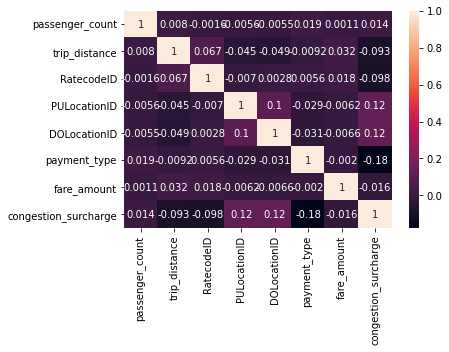

In [16]:
sns.heatmap(corr_matrix, annot=True)

Видно, что стоимость поездки наиболее коррелирует с дистанцией поездки.

## Аномальные поездки

In [17]:
df['datediff'] = df['tpep_dropoff_datetime'] -df['tpep_pickup_datetime']

<ipython-input-17-90f7ff219c74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datediff'] = df['tpep_dropoff_datetime'] -df['tpep_pickup_datetime']


In [18]:
df['datediff']=pd.to_timedelta(df['datediff'])

<ipython-input-18-486c49d5f014>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datediff']=pd.to_timedelta(df['datediff'])


In [19]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,datediff
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.20,1.0,N,142,116,2.0,14.5,3.0,0.5,0.00,0.0,0.3,18,2.5,0 days 00:14:47
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3,0.0,0 days 00:00:06
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3,0.0,0 days 00:00:11
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.5,0.5,0.5,10.00,0.0,0.3,39,0.0,0 days 00:21:16
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.60,1.0,N,161,237,2.0,9.0,3.0,0.5,0.00,0.0,0.3,12,2.5,0 days 00:11:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845294,2.0,2019-12-31 23:09:42,2019-12-31 23:22:39,1.0,1.47,1.0,N,68,246,2.0,10.0,0.5,0.5,0.00,0.0,0.3,13,2.5,0 days 00:12:57
6845295,2.0,2019-12-31 23:46:57,2019-12-31 23:50:54,1.0,0.97,1.0,N,233,170,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10,2.5,0 days 00:03:57
6845296,2.0,2019-12-31 23:22:03,2019-12-31 23:29:06,1.0,3.30,1.0,N,262,224,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17,2.5,0 days 00:07:03
6845297,2.0,2019-12-31 23:33:47,2019-12-31 23:40:10,1.0,1.55,1.0,N,137,4,2.0,7.0,0.5,0.5,0.00,0.0,0.3,10,2.5,0 days 00:06:23


In [20]:
df['time_in_road_sec'] = df['datediff'].dt.total_seconds().astype(float)

<ipython-input-20-f2189212ac1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_in_road_sec'] = df['datediff'].dt.total_seconds().astype(float)


In [21]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,datediff,time_in_road_sec
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.20,1.0,N,142,116,2.0,14.5,3.0,0.5,0.00,0.0,0.3,18,2.5,0 days 00:14:47,887.0
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3,0.0,0 days 00:00:06,6.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3,0.0,0 days 00:00:11,11.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.5,0.5,0.5,10.00,0.0,0.3,39,0.0,0 days 00:21:16,1276.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.60,1.0,N,161,237,2.0,9.0,3.0,0.5,0.00,0.0,0.3,12,2.5,0 days 00:11:05,665.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845294,2.0,2019-12-31 23:09:42,2019-12-31 23:22:39,1.0,1.47,1.0,N,68,246,2.0,10.0,0.5,0.5,0.00,0.0,0.3,13,2.5,0 days 00:12:57,777.0
6845295,2.0,2019-12-31 23:46:57,2019-12-31 23:50:54,1.0,0.97,1.0,N,233,170,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10,2.5,0 days 00:03:57,237.0
6845296,2.0,2019-12-31 23:22:03,2019-12-31 23:29:06,1.0,3.30,1.0,N,262,224,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17,2.5,0 days 00:07:03,423.0
6845297,2.0,2019-12-31 23:33:47,2019-12-31 23:40:10,1.0,1.55,1.0,N,137,4,2.0,7.0,0.5,0.5,0.00,0.0,0.3,10,2.5,0 days 00:06:23,383.0


In [22]:
 df.query("time_in_road_sec< 60")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,datediff,time_in_road_sec
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2.0,2.50,0.5,0.5,0.00,0.00,0.3,3,0.0,0 days 00:00:06,6.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2.0,2.50,0.5,0.5,0.00,0.00,0.3,3,0.0,0 days 00:00:11,11.0
15,1.0,2019-12-01 00:08:57,2019-12-01 00:09:18,1.0,0.00,5.0,N,246,246,1.0,15.00,2.5,0.0,2.50,0.00,0.3,20,0.0,0 days 00:00:21,21.0
127,2.0,2019-12-01 00:42:18,2019-12-01 00:43:04,1.0,0.11,1.0,N,4,232,1.0,2.50,0.5,0.5,1.00,0.00,0.3,7,2.5,0 days 00:00:46,46.0
271,1.0,2019-12-01 00:32:40,2019-12-01 00:33:12,0.0,7.00,5.0,N,42,42,1.0,61.42,0.0,0.0,4.00,0.00,0.3,65,0.0,0 days 00:00:32,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845240,1.0,2019-12-31 23:02:59,2019-12-31 23:03:08,1.0,0.00,1.0,N,219,219,2.0,2.50,0.5,0.5,0.00,0.00,0.3,3,0.0,0 days 00:00:09,9.0
6845255,2.0,2019-12-31 23:07:05,2019-12-31 23:07:14,5.0,0.10,2.0,N,107,107,1.0,52.00,0.0,0.5,12.28,6.12,0.3,73,2.5,0 days 00:00:09,9.0
6845272,2.0,2019-12-31 23:50:58,2019-12-31 23:51:41,1.0,0.06,2.0,N,132,132,2.0,52.00,0.0,0.5,0.00,0.00,0.3,52,0.0,0 days 00:00:43,43.0
6845278,1.0,2019-12-31 23:33:01,2019-12-31 23:33:01,1.0,0.00,1.0,Y,132,264,2.0,18.50,0.5,0.5,0.00,0.00,0.3,19,0.0,0 days 00:00:00,0.0


В последнем столбце вычисленна длительность поездки в секундах. Из данных выше видно, что 72665 поездки можно считать аномальными, так как их длительность состовляла меньше 60 секунд.

In [23]:
df.query("fare_amount < 0")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,datediff,time_in_road_sec
708,2.0,2019-12-01 00:07:31,2019-12-01 00:24:55,1.0,5.76,1.0,N,163,116,4.0,-20.0,-0.5,-0.5,0.0,0.0,-0.3,-23,-2.5,0 days 00:17:24,1044.0
1108,2.0,2019-12-01 00:01:55,2019-12-01 00:03:52,5.0,0.18,1.0,N,65,65,3.0,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4,0.0,0 days 00:01:57,117.0
1309,2.0,2019-12-01 00:09:47,2019-12-01 00:26:51,1.0,3.93,1.0,N,229,7,4.0,-15.5,-0.5,-0.5,0.0,0.0,-0.3,-19,-2.5,0 days 00:17:04,1024.0
1688,2.0,2019-12-01 00:54:27,2019-12-01 00:56:10,1.0,0.78,1.0,N,90,100,3.0,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-7,-2.5,0 days 00:01:43,103.0
1766,2.0,2019-12-01 00:40:46,2019-12-01 00:48:19,1.0,2.21,1.0,N,263,233,4.0,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-12,-2.5,0 days 00:07:33,453.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844814,2.0,2019-12-31 23:31:43,2019-12-31 23:35:09,1.0,0.50,1.0,N,163,161,3.0,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8,-2.5,0 days 00:03:26,206.0
6844816,2.0,2019-12-31 23:38:13,2019-12-31 23:46:20,1.0,1.93,1.0,N,163,236,3.0,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-12,-2.5,0 days 00:08:07,487.0
6844917,2.0,2019-12-31 23:06:53,2019-12-31 23:10:19,2.0,0.00,1.0,N,48,48,4.0,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-7,-2.5,0 days 00:03:26,206.0
6844993,2.0,2019-12-31 23:08:11,2019-12-31 23:08:31,1.0,0.01,1.0,N,164,164,4.0,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-6,-2.5,0 days 00:00:20,20.0


В таблице выше так же привидены аномальные поездки, так как их стоимость была отрицательной, чего быть не может.

## Распределение по стоимости поездок

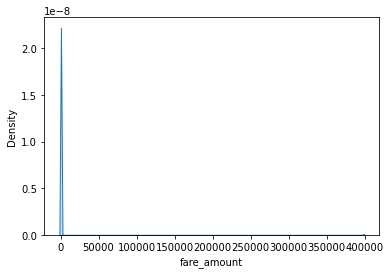

In [24]:
snsplot = sns.kdeplot(df['fare_amount'], shade=True)
fig = snsplot.get_figure()

На приведенном выше графике нельзя сделать вывод о нормальности распределния, поскольку данных слишком много, поэтому в качестве данных мы возьмем среднюю стоимость поездки в каждый день месяца.

In [25]:
df['cal_date'] = df['tpep_pickup_datetime'].dt.date

<ipython-input-25-60278b7b5d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cal_date'] = df['tpep_pickup_datetime'].dt.date


In [26]:
new_df = df.groupby('cal_date').fare_amount.agg('mean').reset_index().sort_values('cal_date')

In [27]:
new_df

,cal_date,fare_amount
0,2008-12-31,16.183333
1,2009-01-01,28.482759
2,2019-11-30,12.906250
3,2019-12-01,13.816983
4,2019-12-02,13.593603
...,...,...
82,2020-07-08,5.000000
83,2026-12-16,52.000000
84,2058-12-02,7.166667
85,2066-12-17,52.000000


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cal_date     87 non-null     object 
 1   fare_amount  87 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


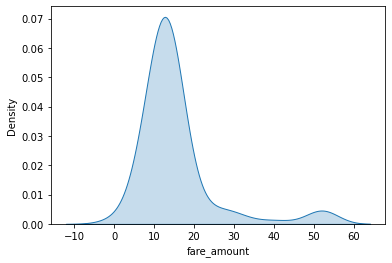

In [29]:
snsplot = sns.kdeplot(new_df['fare_amount'], shade=True)
fig = snsplot.get_figure()

In [30]:
sps.normaltest(new_df.fare_amount)

NormaltestResult(statistic=65.69638129552602, pvalue=5.422656080388821e-15)

По графику выше видно, что распределение стоимости близко к нормальному, но изза большого "хвоста" таковым не является.

## Построение модели описания тарифа

In [31]:
df. head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,datediff,time_in_road_sec,cal_date
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,...,3.0,0.5,0.0,0.0,0.3,18,2.5,0 days 00:14:47,887.0,2019-12-01
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,...,0.5,0.5,0.0,0.0,0.3,3,0.0,0 days 00:00:06,6.0,2019-12-01
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,...,0.5,0.5,0.0,0.0,0.3,3,0.0,0 days 00:00:11,11.0,2019-12-01
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,...,0.5,0.5,10.0,0.0,0.3,39,0.0,0 days 00:21:16,1276.0,2019-12-01
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,...,3.0,0.5,0.0,0.0,0.3,12,2.5,0 days 00:11:05,665.0,2019-12-01


In [38]:
skm = LinearRegression()

In [39]:
X = df.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 
             'payment_type', 'fare_amount',
            'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
            'total_amount', 'datediff', 'cal_date'], axis =1)
Y = df.fare_amount

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [41]:
skm.fit(X_train,Y_train)

LinearRegression()

In [44]:
skm.score(X_train,Y_train)

0.001091560495659727

In [45]:
skm.score(X_test,Y_test)

0.2814170960932413

In [46]:
print(skm.intercept_)
print(skm.coef_)

5.0097292122896935
[ 1.08948743e-01  4.23071573e-01  2.53669411e+00 -6.17421022e-03
 -6.87200370e-03  4.43856042e+01 -3.12591414e+00  3.59857547e-04]


In [49]:
new_price = skm.predict(X)

In [52]:
df1 = pd.DataFrame()

In [62]:
df1 = df1.assign(new_price = skm.predict(X))

In [63]:
df1

,new_price
0,13.578472
1,19.081511
2,19.083311
3,24.492212
4,11.558724
...,...
6845294,11.947433
6845295,11.045102
6845296,11.547652
6845297,13.076500


Видно, что к концу месяца стоимость поездок ниже, чем в начале, думмаю это связано с тем, что была какая-то акция в связи с новогодними праздниками.